In [3]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

# Splitting the dataset into the Training set and Test set
# # install.packages('caTools')
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Salary, SplitRatio = 2/3)
# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

In [4]:
version

               _                           
platform       x86_64-apple-darwin15.6.0   
arch           x86_64                      
os             darwin15.6.0                
system         x86_64, darwin15.6.0        
status                                     
major          3                           
minor          5.2                         
year           2018                        
month          12                          
day            20                          
svn rev        75870                       
language       R                           
version.string R version 3.5.2 (2018-12-20)
nickname       Eggshell Igloo              

In [6]:
# Fitting SVR to the dataset
# install.packages('e1071')
# e1071 does feature scaling by default
library(e1071)
regressor = svm(formula = Salary ~ .,
                data = dataset,
                type = 'eps-regression',
                kernel = 'radial')

# Predicting a new result
y_pred = predict(regressor, data.frame(Level = 6.5))

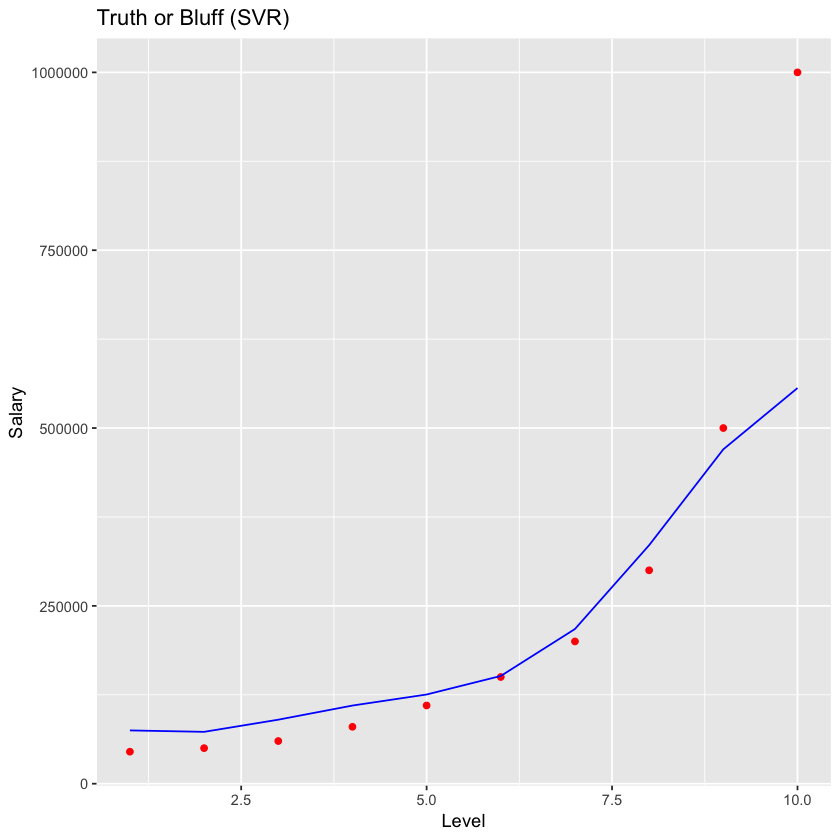

In [7]:
# Visualising the SVR results
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(regressor, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (SVR)') +
  xlab('Level') +
  ylab('Salary')


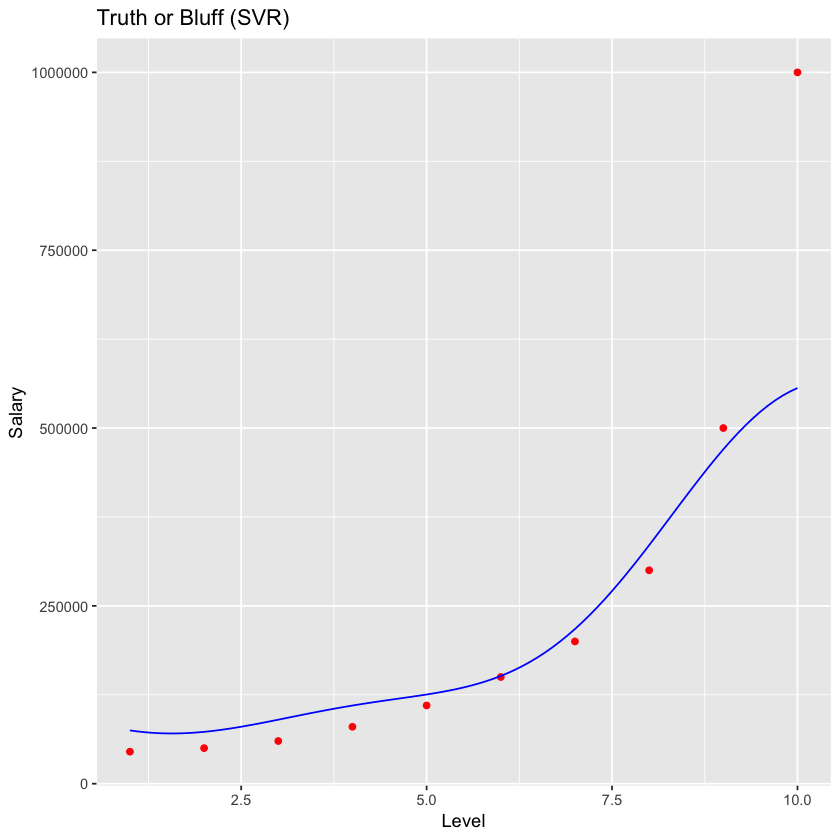

In [8]:
# Visualising the SVR results (for higher resolution and smoother curve)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (SVR)') +
  xlab('Level') +
  ylab('Salary')